The 'race/ethnicity' column has been removed from the dataset.

Model Evaluation:
Mean Absolute Error (MAE): 4.82
Mean Squared Error (MSE): 35.65
R-squared (R²): 0.84

Top 5 Incorrectly Predicted Samples:
---------------------------------------
Index | Actual | Predicted | Error
------|--------|-----------|-------
859   | 94.00  | 79.06     | 14.94
260   | 59.00  | 44.51     | 14.49
820   | 81.00  | 66.53     | 14.47
947   | 65.00  | 79.17     | 14.17
865   | 77.00  | 91.08     | 14.08


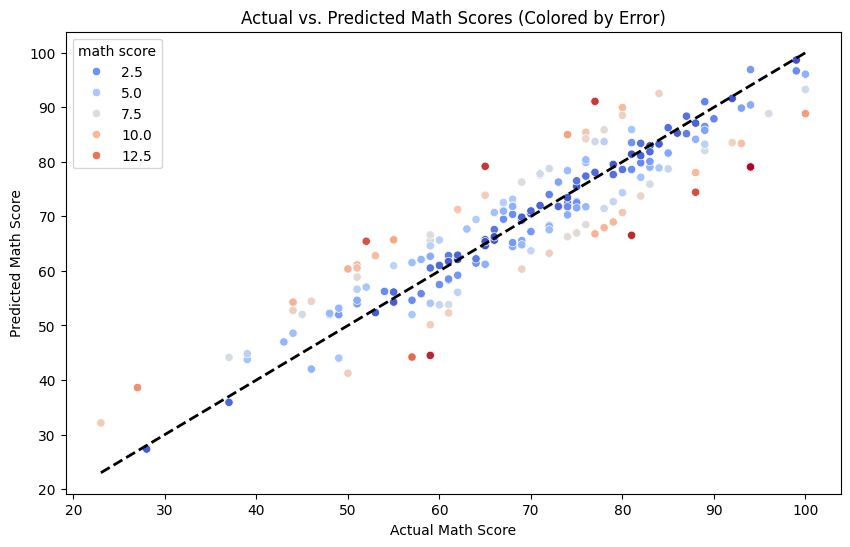


Feature Importance:
                                              Feature  Importance
0                                  num__reading score    0.644916
1                                  num__writing score    0.164577
2                                  cat__gender_female    0.057568
3                                    cat__gender_male    0.051682
11                                cat__lunch_standard    0.014090
10                            cat__lunch_free/reduced    0.012687
12             cat__test preparation course_completed    0.008994
6        cat__parental level of education_high school    0.008614
13                  cat__test preparation course_none    0.008221
5   cat__parental level of education_bachelor's de...    0.006854
8       cat__parental level of education_some college    0.006718
9   cat__parental level of education_some high school    0.006273
4   cat__parental level of education_associate's d...    0.006165
7    cat__parental level of education_master's degree  

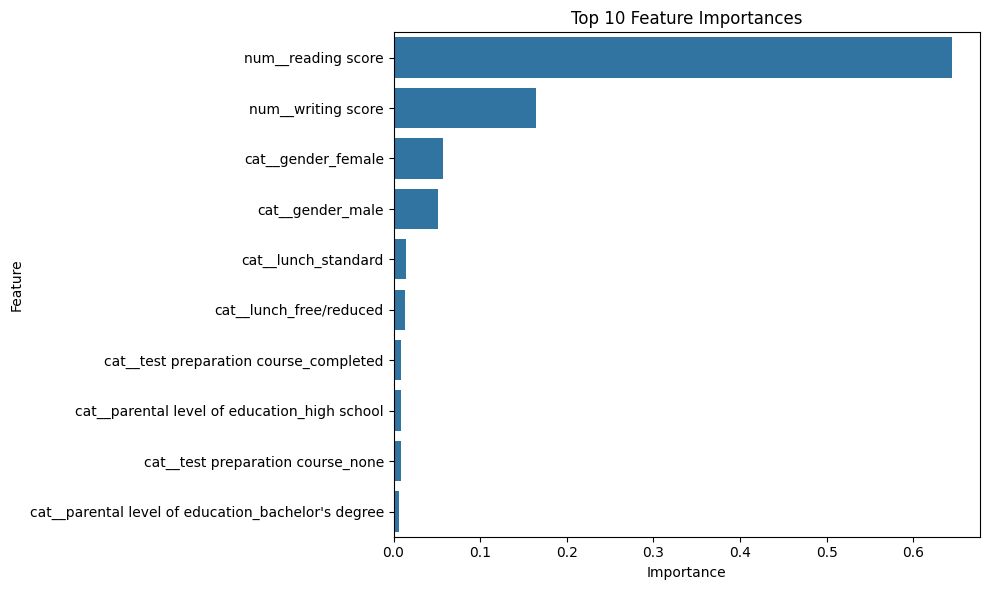

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Load the dataset
try:
    df = pd.read_csv('exams.csv')
except FileNotFoundError:
    print("Error: The file 'exams.csv' was not found. Please make sure it is in the correct directory.")
    exit()

#Drop 'race/ethnicity' column 
if 'race/ethnicity' in df.columns:
    df = df.drop('race/ethnicity', axis=1)
    print("The 'race/ethnicity' column has been removed from the dataset.")
else:
    print("The 'race/ethnicity' column was not found in the dataset.")

#Define features (X) and target (y)
#Let's predict 'math score'
X = df.drop('math score', axis=1)
y = df['math score']

#Identify categorical and numerical features
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns

#Create preprocessing pipelines for numerical and categorical features
numerical_transformer = 'passthrough'  

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# reate a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Create the full pipeline with preprocessing and a model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(random_state=42))])

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

#Identify 5 incorrectly predicted samples
error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
errors = abs(error_df['Predicted'] - error_df['Actual'])
error_df['Error'] = errors
incorrect_predictions = error_df.sort_values(by='Error', ascending=False).head(5)

print("\nTop 5 Incorrectly Predicted Samples:")
print("---------------------------------------")
print("Index | Actual | Predicted | Error")
print("------|--------|-----------|-------")
for index, row in incorrect_predictions.iterrows():
    print(f"{index:<5} | {row['Actual']:<6.2f} | {row['Predicted']:<9.2f} | {row['Error']:<5.2f}")

#Visualize predictions vs. actual values
error = np.abs(y_test - y_pred)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, hue=error, palette='coolwarm') # 'coolwarm' is a diverging colormap
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs. Predicted Math Scores (Colored by Error)')
plt.show()

#Feature Importance 
if 'regressor' in model.named_steps and hasattr(model.named_steps['regressor'], 'feature_importances_'):
    feature_names = model.named_steps['preprocessor'].get_feature_names_out()
    importances = model.named_steps['regressor'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()
else:
    print("\nFeature importance is not available for this model after preprocessing.")